In [1]:
#Importing Stock Prices Dataset from YAHOO FINANCE
import yfinance as yf

In [2]:
#Here we importing Stock Prices Historical data of Apple Inc. from yahoo finances using Ticker
stock_symbol = "AAPL"
stockdata_period = "10y"
stockdata_interval = "1d"

In [3]:
#Fetching 10yrs stock prices historical data with an interval of 1 day
dataset = yf.download(tickers=stock_symbol,period=stockdata_period,interval=stockdata_interval)

[*********************100%***********************]  1 of 1 completed


In [4]:
#Dataset that we fetched from YAHOO FINANCE
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-07-11,12.726429,12.848929,12.600714,12.642857,10.871630,442674400
2011-07-12,12.626071,12.774286,12.450714,12.633929,10.863953,451609200
2011-07-13,12.797500,12.857143,12.727857,12.786429,10.995090,391638800
2011-07-14,12.893214,12.914643,12.726429,12.777500,10.987410,430533600
2011-07-15,12.898929,13.035714,12.827500,13.032857,11.206989,484467200
...,...,...,...,...,...,...
2021-07-02,137.899994,140.000000,137.750000,139.960007,139.960007,78852600
2021-07-06,140.070007,143.149994,140.070007,142.020004,142.020004,108181800
2021-07-07,143.539993,144.889999,142.660004,144.570007,144.570007,104911600


In [5]:
#Here our main concern is OPEN PRICE so we are fetching single column as our final dataset
dataset = dataset["Open"]

In [6]:
#See our final dataset having only OPEN PRICE Data
dataset

Date
2011-07-11     12.726429
2011-07-12     12.626071
2011-07-13     12.797500
2011-07-14     12.893214
2011-07-15     12.898929
                 ...    
2021-07-02    137.899994
2021-07-06    140.070007
2021-07-07    143.539993
2021-07-08    141.580002
2021-07-09    142.750000
Name: Open, Length: 2517, dtype: float64

In [7]:
#1d format data
dataset.shape

(2517,)

<AxesSubplot:xlabel='Date'>

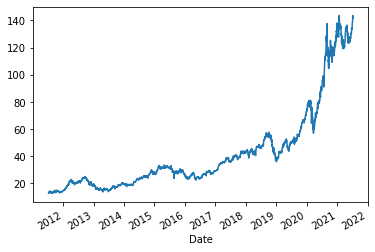

In [8]:
#See graphical representation of OPEN PRICE of our dataset
dataset.plot()

In [9]:
type(dataset)

pandas.core.series.Series

In [10]:
#Converting datatype of dataset from pandas dataframe to numpy array for further operations on it
dataset = dataset.to_numpy()

In [11]:
type(dataset)

numpy.ndarray

In [12]:
#Only datatype changes but shape remains same
dataset.shape

(2517,)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

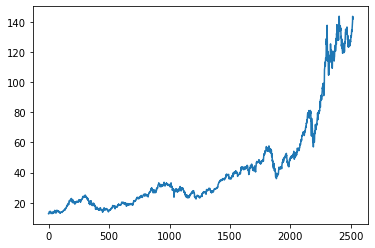

In [14]:
#Graphical representation of OPEN PRICE dataset we would work upon later
#same graph
plt.plot(dataset)

In [15]:
#Importing MinMaxScaler function from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

In [16]:
#Using MinMaxScaler for creating normaliser to scale/normalise our data between 0 to 1
normalizer = MinMaxScaler(feature_range=(0,1))

In [17]:
#Converting 1d ==>2D to feed data to normalizer as it accepts only 2D data
dataset = dataset.reshape((-1,1))
dataset.shape

(2517, 1)

In [18]:
#Scaling our dataset to a scale of 0 to 1 and saving scaled data to another 
#variable named "dataset_scaled"
dataset_scaled = normalizer.fit_transform(dataset)

In [19]:
dataset_scaled

array([[7.66244133e-04],
       [0.00000000e+00],
       [1.30887631e-03],
       ...,
       [9.99541796e-01],
       [9.84577051e-01],
       [9.93510113e-01]])

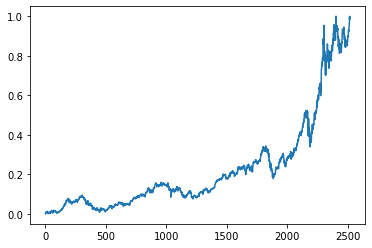

In [20]:
#See graphical representation of our data as its values are scaled from 0 to 1
plt.plot(dataset_scaled)

In [21]:
#Splitting data into train and test split
#Specifying train split percentage for train-test split
#Here we require 70% data as training data
train_split_percent = 70

In [22]:
#Calculating training set and testing set size
train_split_size = int(len(dataset_scaled) * ( train_split_percent * 0.01))
test_split_size = int(len(dataset_scaled) * ((100 - train_split_percent) * 0.01))

In [23]:
dataset_scaled.shape

(2517, 1)

In [24]:
train_split_size

1761

In [25]:
test_split_size

755

In [26]:
#Splitting Actual dataset into train and test data for training model
train_dataset = dataset_scaled[0:train_split_size]
test_dataset = dataset_scaled[train_split_size:]

In [27]:
train_dataset.shape

(1761, 1)

In [28]:
test_dataset.shape

(756, 1)

In [29]:
#Creating timeseries dataset to feed into LTSM Model
def create_dataset(dataset,step):
    x = []
    y = []
    for i in range(len(dataset)-step):
        x.append(dataset[i:i+step])
        y.append(dataset[i+step])
    return np.array(x),np.array(y)

In [30]:
#Here in our case data repeats its pattern in particular step period
step=5

In [31]:
#Creating X and Y to feed into model for training
trainX , trainY = create_dataset(train_dataset,step)

In [32]:
trainX.shape

(1756, 5, 1)

In [33]:
#Creating X and Y to test accuracy of our model
testX , testY = create_dataset(test_dataset,step)

In [34]:
testX.shape

(751, 5, 1)

In [35]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [36]:
#Creating LSTM Model using 6 layers
model = Sequential()
model.add(LSTM(units=70,return_sequences=True,input_shape=(trainX.shape[1],trainX.shape[2])))
model.add(LSTM(units=70,return_sequences=True))
model.add(LSTM(units=70,return_sequences=True))
model.add(LSTM(units=70,return_sequences=True))
model.add(LSTM(units=70))
model.add(Dense(units=1,activation="linear"))   #last layer of our model

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 70)             20160     
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 70)             39480     
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 70)             39480     
_________________________________________________________________
lstm_3 (LSTM)                (None, 5, 70)             39480     
_________________________________________________________________
lstm_4 (LSTM)                (None, 70)                39480     
_________________________________________________________________
dense (Dense)                (None, 1)                 71        
Total params: 178,151
Trainable params: 178,151
Non-trainable params: 0
__________________________________________________

In [38]:
#Feeding data into model and training it using Adam optimizer and mean_squared_error function
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(trainX,trainY,epochs=100)
model.save("model.h5")

Epoch 1/100
55/55 [==============================] - 20s 53ms/step - loss: 0.0063
Epoch 2/100
55/55 [==============================] - 3s 49ms/step - loss: 9.9317e-05
Epoch 3/100
55/55 [==============================] - 3s 48ms/step - loss: 4.1875e-05
Epoch 4/100
55/55 [==============================] - 3s 49ms/step - loss: 4.4610e-05
Epoch 5/100
55/55 [==============================] - 3s 49ms/step - loss: 4.3587e-05
Epoch 6/100
55/55 [==============================] - 3s 50ms/step - loss: 4.3537e-05
Epoch 7/100
55/55 [==============================] - 3s 49ms/step - loss: 4.3398e-05
Epoch 8/100
55/55 [==============================] - 3s 51ms/step - loss: 4.6739e-05
Epoch 9/100
55/55 [==============================] - 3s 48ms/step - loss: 5.5046e-05
Epoch 10/100
55/55 [==============================] - 3s 48ms/step - loss: 4.6151e-05
Epoch 11/100
55/55 [==============================] - 3s 50ms/step - loss: 5.8062e-05
Epoch 12/100
55/55 [==============================] - 3s 50ms/step

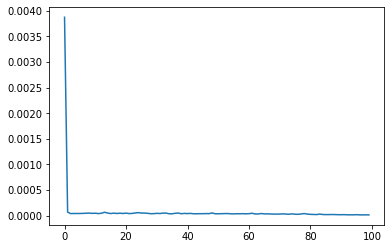

In [39]:
#Lets perform graphical representation of loss of trained model
plt.plot(model.history.history["loss"])

In [40]:
#Using Trained Model for performing prediction on test data and train data.Finally, merging
#to represent in single graph and performing inverse transform on top of it
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
predicted_data = np.vstack((train_predict,test_predict))
predicted_data = normalizer.inverse_transform(predicted_data)

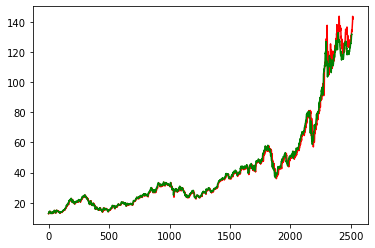

In [41]:
#Lets compare predicted data with actual data via graphical representation
plt.plot(dataset,color="red")  #actual data
plt.plot(predicted_data,color="green")  #predicted data
#See graph is overlapping so its an accurate model

In [ ]:
#function for sending email
def email_sent():
    import smtplib
    from email.mime.multipart import MIMEMultipart
    from email.mime.text import MIMEText
    from email.mime.base import MIMEBase
    from email import encoders
    fromaddr = "sender_email_address"
    toaddr = "recipent_email_address"
# instance of MIMEMultipart
    msg = MIMEMultipart()
# storing the senders email address  
    msg['From'] = fromaddr
# storing the receivers email address 
    msg['To'] = toaddr
# storing the subject 
    msg['Subject'] = "THRESHOLD REACHED!!!!"
# string to store the body of the mail
    body = "Your Specified Threshold is reached..."
# attach the body with the msg instance
    msg.attach(MIMEText(body, 'plain'))
# open the file to be sent 
    filename = "graph.png"
    attachment = open("./graph.png", "rb")
# instance of MIMEBase and named as p
    p = MIMEBase('application', 'octet-stream')
# To change the payload into encoded form
    p.set_payload((attachment).read())
# encode into base64
    encoders.encode_base64(p)
    p.add_header('Content-Disposition', "attachment; filename= %s" % filename)
# attach the instance 'p' to instance 'msg'
    msg.attach(p)
# creates SMTP session
    s = smtplib.SMTP('smtp.gmail.com', 587)
# start TLS for security
    s.starttls()
# Authentication
    s.login(fromaddr, "password_of_sender")
# Converts the Multipart msg into a string
    text = msg.as_string()
# sending the mail
    s.sendmail(fromaddr, toaddr, text)
# terminating the session
    s.quit()

In [47]:
#We can see our Trained Model is Accurate in predicting test values. Lets predict future 
#values using currently available data.
def future_prediction(dataset,model,step,days_to_predict,threshold_value):
    new_dataset = dataset
    for i in range(days_to_predict):
        step_data = new_dataset[-step:]
        step_data = step_data.reshape((1,step_data.shape[0],1))
        predicted_future_value = model.predict(step_data)
        predicted_future_value = predicted_future_value.reshape(1)
        new_dataset = np.vstack((new_dataset,predicted_future_value))
        if predicted_future_value >= threshold_value:
            break
        else:
            pass
    plt.plot(normalizer.inverse_transform(new_dataset),color="red")
    plt.ylabel("Price")
    plt.xlabel("Time")
    plt.axhline(y=threshold_value,color="blue")
    plt.savefig("./graph.png")
    email_sent()

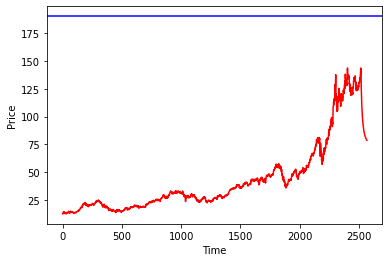

In [50]:
#Predicting OPEN PRICE for future days
future_prediction(dataset=dataset_scaled,
                  model=model,
                  step=5,
                  days_to_predict=50,
                  threshold_value=190)